In [1]:
MAX_ITER = 80

def mandelbrot(c):
    z = 0
    n = 0
    while abs(z) <= 2 and n < MAX_ITER:
        z = z*z + c
        n += 1
    return n

if __name__ == "__main__":
    for a in range(-10, 10, 5):
        for b in range(-10, 10, 5):
            c = complex(a / 10, b / 10)
            print(c, mandelbrot(c))

    

(-1-1j) 3
(-1-0.5j) 5
(-1+0j) 80
(-1+0.5j) 5
(-0.5-1j) 4
(-0.5-0.5j) 80
(-0.5+0j) 80
(-0.5+0.5j) 80
-1j 80
-0.5j 80
0j 80
0.5j 80
(0.5-1j) 2
(0.5-0.5j) 5
(0.5+0j) 5
(0.5+0.5j) 5


In [2]:
from PIL import Image, ImageDraw
#from mandelbrot import mandelbrot, MAX_ITER

# Image size (pixels)
WIDTH = 600
HEIGHT = 400

# Plot window
RE_START = -2
RE_END = 1
IM_START = -1
IM_END = 1

palette = []

im = Image.new('RGB', (WIDTH, HEIGHT), (0, 0, 0))
draw = ImageDraw.Draw(im)

for x in range(0, WIDTH):
    for y in range(0, HEIGHT):
        # Convert pixel coordinate to complex number
        c = complex(RE_START + (x / WIDTH) * (RE_END - RE_START),
                    IM_START + (y / HEIGHT) * (IM_END - IM_START))
        # Compute the number of iterations
        m = mandelbrot(c)
        # The color depends on the number of iterations
        color = 255 - int(m * 255 / MAX_ITER)
        # Plot the point
        draw.point([x, y], (color, color, color))

im.save('output.png', 'PNG')


In [3]:
#from PIL import Image, ImageDraw
#from mandelbrot import mandelbrot, MAX_ITER

# Image size (pixels)
WIDTH = 600
HEIGHT = 400

# Plot window
RE_START = -2
RE_END = 1
IM_START = -1
IM_END = 1

im = Image.new('HSV', (WIDTH, HEIGHT), (0, 0, 0))
draw = ImageDraw.Draw(im)

for x in range(0, WIDTH):
    for y in range(0, HEIGHT):
        # Convert pixel coordinate to complex number
        c = complex(RE_START + (x / WIDTH) * (RE_END - RE_START),
                    IM_START + (y / HEIGHT) * (IM_END - IM_START))
        # Compute the number of iterations
        m = mandelbrot(c)
        # The color depends on the number of iterations
        hue = int(255 * m / MAX_ITER)
        saturation = 255
        value = 255 if m < MAX_ITER else 0
        # Plot the point
        draw.point([x, y], (hue, saturation, value))

im.convert('RGB').save('output.png', 'PNG')


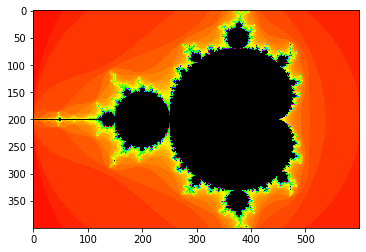

In [4]:
import matplotlib.pyplot as plt
plt.imshow(im)

In [5]:
from math import log, log2

MAX_ITER = 80

def julia(c, z0):
    z = z0
    n = 0
    while abs(z) <= 2 and n < MAX_ITER:
        z = z*z + c
        n += 1

    if n == MAX_ITER:
        return MAX_ITER
    
    return n + 1 - log(log2(abs(z)))


In [8]:
from PIL import Image, ImageDraw
#from julia import julia, MAX_ITER
from collections import defaultdict
from math import floor, ceil

def linear_interpolation(color1, color2, t):
    return color1 * (1 - t) + color2 * t 

# Image size (pixels)
WIDTH = 400
HEIGHT = 480

# Plot window
RE_START = -1
RE_END = 1
IM_START = -1.2
IM_END = 1.2

# c constant used to compute the julia set
#c = complex(0.285, 0.01)
# Other interesting values:
c = complex(-0.8269, 0.1889)
# c = complex(-0.8, 0.156)
# c = complex(-0.4, 0.6)

histogram = defaultdict(lambda: 0)
values = {}
for x in range(0, WIDTH):
    for y in range(0, HEIGHT):
        # Convert pixel coordinate to complex number
        z0 = complex(RE_START + (x / WIDTH) * (RE_END - RE_START),
                    IM_START + (y / HEIGHT) * (IM_END - IM_START))
        # Compute the number of iterations
        m = julia(c, z0)
        
        values[(x, y)] = m
        if m < MAX_ITER:
            histogram[floor(m)] += 1

total = sum(histogram.values())
hues = []
h = 0
for i in range(MAX_ITER):
    h += histogram[i] / total
    hues.append(h)
hues.append(h)
 
im = Image.new('HSV', (WIDTH, HEIGHT), (0, 0, 0))
draw = ImageDraw.Draw(im)

for x in range(0, WIDTH):
    for y in range(0, HEIGHT):
        m = values[(x, y)]
        # The color depends on the number of iterations    
        hue = 255 - int(255 * linear_interpolation(hues[floor(m)], hues[ceil(m)], m % 1))
        saturation = 255
        value = 255 if m < MAX_ITER else 0
        # Plot the point
        draw.point([x, y], (hue, saturation, value))

im.convert('RGB').save('output.png', 'PNG')



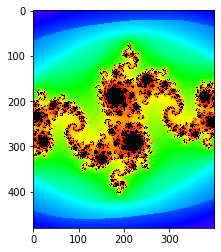

In [9]:
plt.imshow(im)

In [5]:
from PIL import Image, ImageDraw
#from julia import julia, MAX_ITER
from collections import defaultdict
from math import floor, ceil
import numpy as np

def linear_interpolation(color1, color2, t):
    return color1 * (1 - t) + color2 * t 

# Image size (pixels)
WIDTH = 400
HEIGHT = 480

# Plot window
RE_START = -1
RE_END = 1
IM_START = -1.2
IM_END = 1.2

c = complex(0.285, 0.01)

T = 20
for t in range(T):
    # c constant used to compute the julia set
    
    c = c*np.exp(complex(0,np.pi/60))
    # Other interesting values:
    # c = complex(-0.7269, 0.1889)
    # c = complex(-0.8, 0.156)
    # c = complex(-0.4, 0.6)

    histogram = defaultdict(lambda: 0)
    values = {}
    for x in range(0, WIDTH):
        for y in range(0, HEIGHT):
            # Convert pixel coordinate to complex number
            z0 = complex(RE_START + (x / WIDTH) * (RE_END - RE_START),
                        IM_START + (y / HEIGHT) * (IM_END - IM_START))
            # Compute the number of iterations
            m = julia(c, z0)

            values[(x, y)] = m
            if m < MAX_ITER:
                histogram[floor(m)] += 1

    total = sum(histogram.values())
    hues = []
    h = 0
    for i in range(MAX_ITER):
        h += histogram[i] / total
        hues.append(h)
    hues.append(h)

    im = Image.new('HSV', (WIDTH, HEIGHT), (0, 0, 0))
    draw = ImageDraw.Draw(im)

    for x in range(0, WIDTH):
        for y in range(0, HEIGHT):
            m = values[(x, y)]
            # The color depends on the number of iterations    
            hue = 255 - int(255 * linear_interpolation(hues[floor(m)], hues[ceil(m)], m % 1))
            saturation = 255
            value = 255 if m < MAX_ITER else 0
            # Plot the point
            draw.point([x, y], (hue, saturation, value))

    im.convert('RGB').save('C:\\Users\\Ronald\\Downloads\\fraktol\\output%05d.png' % t, 'PNG')

    plt.imshow(im)
!convert -delay 5 -loop 0 C:\Users\Ronald\Downloads\fraktol\output*.png C:\Users\\Ronald\Downloads\fraktol\fractal.gif

NameError: name 'julia' is not defined

In [ ]:
for t in range(T):
    

In [14]:
!convert -delay 5 -loop 0 C:\Users\Ronald\Downloads\fraktol\output*.png C:\Users\\Ronald\Downloads\fraktol\fractal.gif

Ongeldige parameter - 5


In [5]:
import os
os.system("convert -delay 3 -loop 0 C:\\Users\\Ronald\\Downloads\\fraktol\\output*.png C:\\Users\\Ronald\\Downloads\\fraktol\\fractal6.gif")

0